###Seun Oloruntoba Project (US Airline Tweet Project)

**Background and Context:**

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.

Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

**Data Description:**

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

**Dataset:**


The dataset has the following columns:

tweet_id

airline_sentiment

airline_sentiment_confidence

negativereason

negativereason_confidence

airline

airline_sentiment_gold

name

negativereason_gold

retweet_count text 

tweet_coord tweet_created 

tweet_location 

user_timezone

**Objective:**

To implement the techniques learned as a part of the course.

**Additional View and Opinion**

This project explore sentiment analysis across the US Airlines from; Positive, negative or neutral

This project will explore most used positive or negative words

This project will model prediction of airline sentiments based on the text provided

**Learning Outcomes:**

Basic understanding of text pre-processing. What to do after text pre-processing Bag of words Tf-idf Build the classification model. Evaluate the Model

In [80]:

!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         
import seaborn as sns
import matplotlib.pyplot as plt
#Import all python libraries that may be required 
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold , StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF

from sklearn.ensemble import RandomForestClassifier       # Import Random forest Classifier
from sklearn.metrics import classification_report         # Import Classification report
from sklearn.model_selection import cross_val_score    

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [81]:
#Mount the drive for google colab usage
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
#defining the path of the dataset after uploadig the dataset.h5 into the drive
data = '/content/drive/MyDrive/Project_NLP_tweet/Tweets.csv'

In [83]:
# Loading data into pandas dataframe
data = pd.read_csv("/content/drive/MyDrive/Project_NLP_tweet/Tweets.csv")

In [84]:
# print shape of data.
data.shape                                               

(14640, 15)

In [85]:
# Print first 5 rows of data
data.head()                                              

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [86]:
#To describe the data
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


**Observation: **

Noticed some missing values in negative_reasons and this may be due to not all tweet should have negative reasons, those that are positive are not expected to have negative reason 

In [87]:
#get the unique values of every column
def return_unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

In [88]:
unidf = return_unique_values(data)
print(unidf)

                        Features  Uniques
0                       tweet_id    14485
1              airline_sentiment        3
2   airline_sentiment_confidence     1023
3                 negativereason       10
4      negativereason_confidence     1410
5                        airline        6
6         airline_sentiment_gold        3
7                           name     7701
8            negativereason_gold       13
9                  retweet_count       18
10                          text    14427
11                   tweet_coord      832
12                 tweet_created    14247
13                tweet_location     3081
14                 user_timezone       85


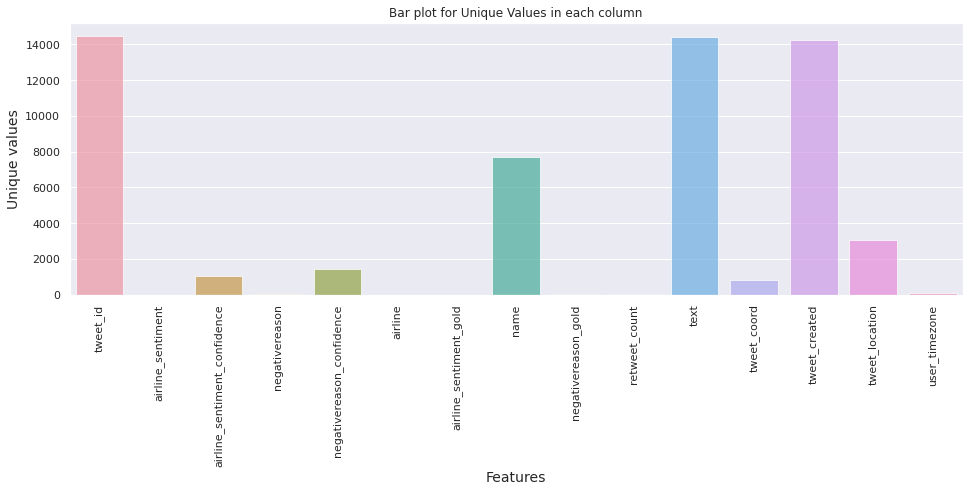

In [89]:
# plot the count of unique values in every column
f, ax = plt.subplots(1,1, figsize=(16,5))
sns.barplot(x=unidf['Features'], y=unidf['Uniques'], alpha=0.7)
plt.title('Bar plot for Unique Values in each column')
plt.ylabel('Unique values', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [90]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    """
    plot
    feature: categorical feature
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

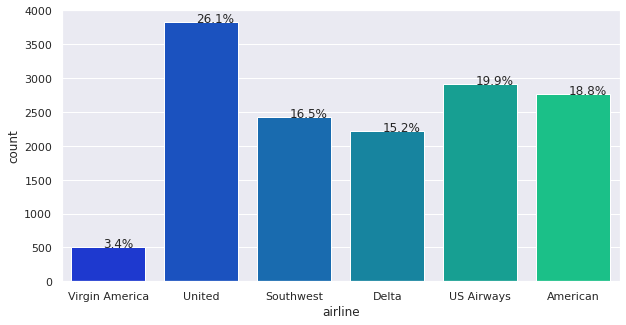

In [91]:
#Distribution of tweets among each airline 
plt.figure(figsize=(10, 5))
ax = sns.countplot(data["airline"], palette="winter")
perc_on_bar(ax, data["airline"])

Observation: United Airline has the highest number of tweet and Virgin America the least 

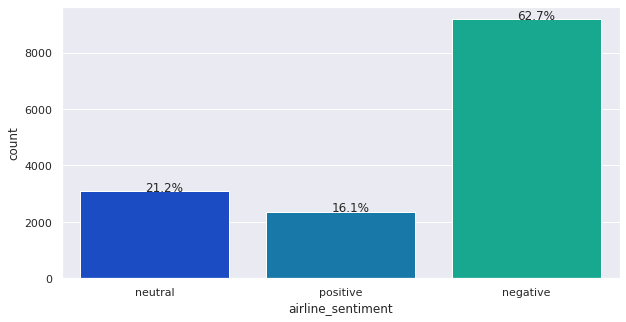

In [92]:
#Distribution of sentiments among the tweet  
plt.figure(figsize=(10, 5))
ax = sns.countplot(data["airline_sentiment"], palette="winter")
perc_on_bar(ax, data["airline_sentiment"])

Observation:
The negative sentiments are much more than the combination of both positive and neutral sentiments

In [93]:
#Plot stack plot to understand the variation of the Personal_Loan with other categorical variables 
## Function to plot stacked bar chart
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, data["airline"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, data["airline"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.show()

airline            American  Delta  Southwest  US Airways  United  \
airline_sentiment                                                   
negative               1960    955       1186        2263    2633   
neutral                 463    723        664         381     697   
positive                336    544        570         269     492   
All                    2759   2222       2420        2913    3822   

airline            Virgin America    All  
airline_sentiment                         
negative                      181   9178  
neutral                       171   3099  
positive                      152   2363  
All                           504  14640  
------------------------------------------------------------------------------------------------------------------------


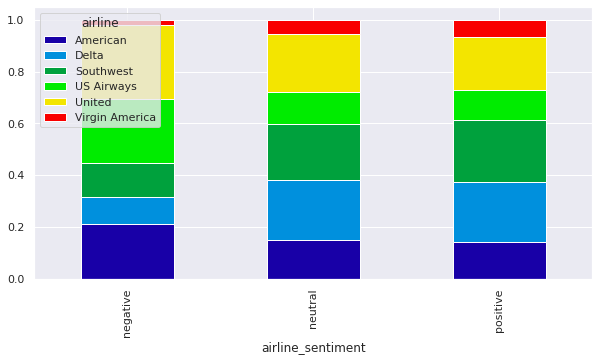

In [94]:
#Understand variation of Personal_Loan with family
stacked_plot(data["airline_sentiment"])

** Observation**
1. United Airline has the highest number of negative sentiments followed by US Airways and American Airline respectively 

2. Southwest Airline has the highest positive sentiments follows by Delta and United respectively 

3. The number of negative sentiments rea far higher than the positive sentiments 

4. Delta has the highest neutral sentiments followed by Southwest and United respectively 

5. The neutral tend towards the same distribution as the positive sentiments 

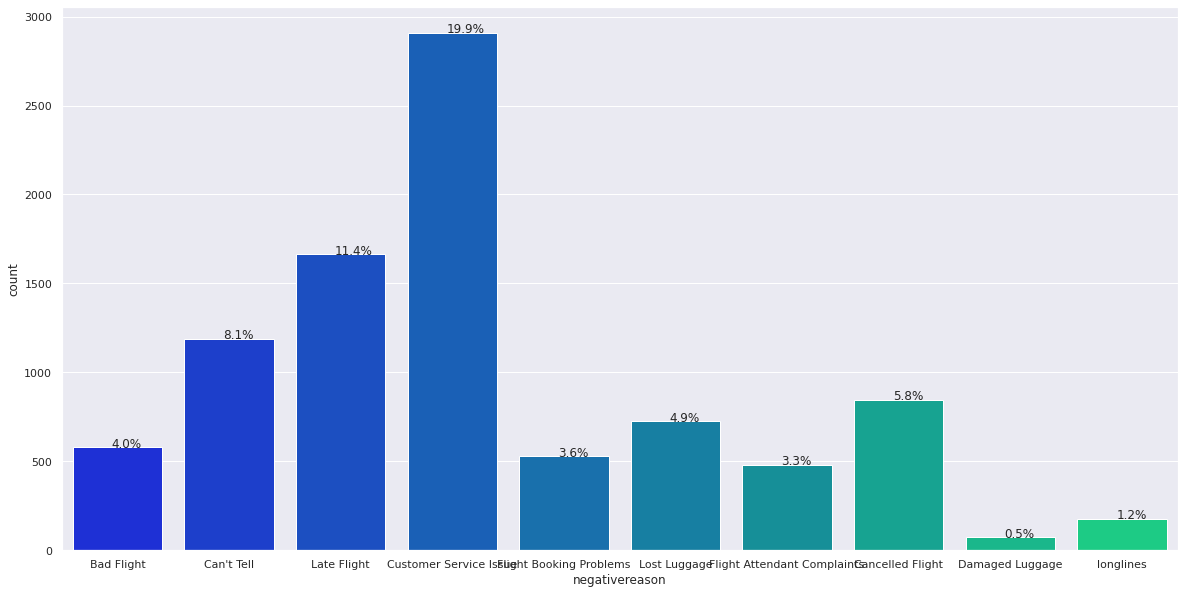

In [95]:
#Distribution of negative reasons among the tweet  
plt.figure(figsize=(20, 10))
ax = sns.countplot(data["negativereason"], palette="winter")
perc_on_bar(ax, data["negativereason"])

**Observation**

The highest negative reason is "Customer Service", followed by "Late Flight"

The least negative reason is "damaged Luggage" 

In [96]:
Positive_sent = data[data['airline_sentiment']=='positive']
Negative_sent = data[data['airline_sentiment']=='negative']


In [97]:
import wordcloud
def show_wordcloud(Positive_sent, title):
    text = ' '.join(Positive_sent['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

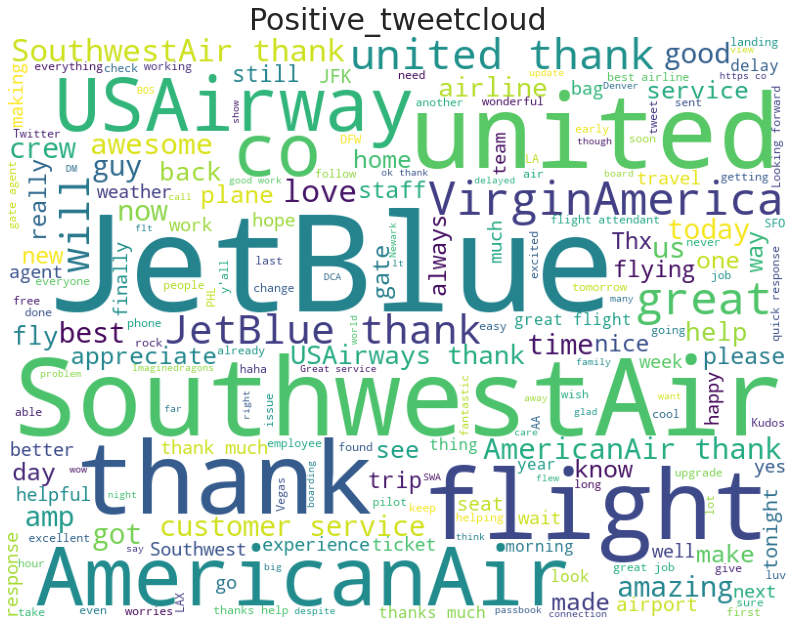

In [98]:
show_wordcloud(Positive_sent, "Positive_tweetcloud")


Word like "thank", excited, Kudos, best, amazing, congratulations higlighted in his positive sentiment tweet 

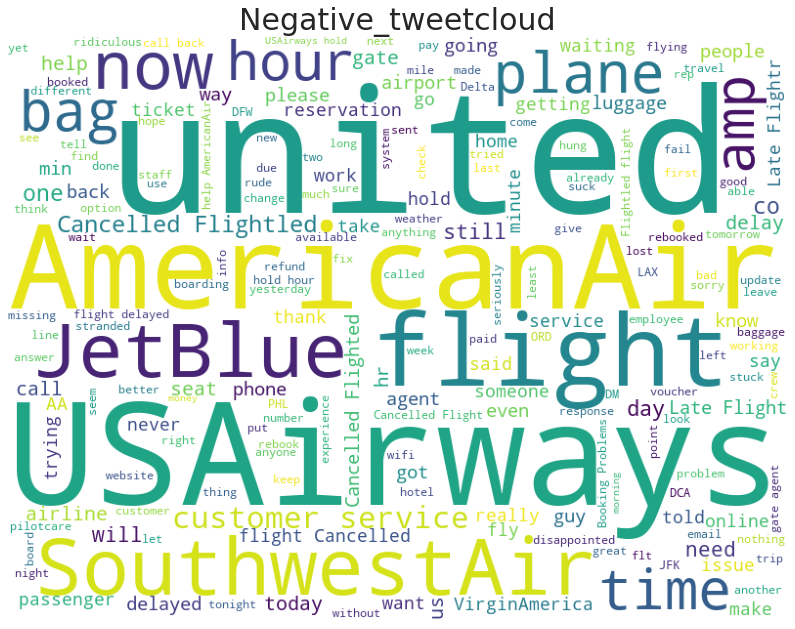

In [99]:
show_wordcloud(Negative_sent, "Negative_tweetcloud")

In [100]:
#Drop all other columns except “text” and “airline_sentiment”
data = data[['airline_sentiment', 'text']]


In [101]:
#Check the shape of the data 
data.shape

(14640, 2)

In [102]:
#Print first 5 rows
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [103]:
# Pre-Processing removal the html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))
data.head()


,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [104]:
#Pre-Processing Tokenization 
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
data.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, 've, added, comm..."
2,neutral,"[@, VirginAmerica, I, did, n't, today, ..., Mu..."
3,negative,"[@, VirginAmerica, it, 's, really, aggressive,..."
4,negative,"[@, VirginAmerica, and, it, 's, a, really, big..."


In [105]:
#remove the numericals present in the text
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text
def clean_text(text):
    text = remove_numbers(text)
data.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, 've, added, comm..."
2,neutral,"[@, VirginAmerica, I, did, n't, today, ..., Mu..."
3,negative,"[@, VirginAmerica, it, 's, really, aggressive,..."
4,negative,"[@, VirginAmerica, and, it, 's, a, really, big..."


In [106]:
def remove_punctuation(words):
    """Remove punctuation and special chararcter from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)    # Append processed words to new list.
    return new_words

In [107]:
data['text'] = data['text'].apply(lambda x: remove_punctuation(x))
data.head()

,airline_sentiment,text
0,neutral,"[VirginAmerica, What, dhepburn, said]"
1,positive,"[VirginAmerica, plus, you, ve, added, commerci..."
2,neutral,"[VirginAmerica, I, did, nt, today, Must, mean,..."
3,negative,"[VirginAmerica, it, s, really, aggressive, to,..."
4,negative,"[VirginAmerica, and, it, s, a, really, big, ba..."


In [108]:
import nltk
nltk.download('stopwords')      #Downloading nltk corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [109]:
stopwords = stopwords.words('english')

In [110]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        if word not in stopwords:
            new_words.append(word)        # Append processed words to new list.
    return new_words

In [111]:
data['text'] = data['text'].apply(lambda x: remove_stopwords(x))
data.head()

,airline_sentiment,text
0,neutral,"[VirginAmerica, What, dhepburn, said]"
1,positive,"[VirginAmerica, plus, added, commercials, expe..."
2,neutral,"[VirginAmerica, I, nt, today, Must, mean, I, n..."
3,negative,"[VirginAmerica, really, aggressive, blast, obn..."
4,negative,"[VirginAmerica, really, big, bad, thing]"


In [112]:
#To convert to lower case
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()           # Converting to lowercase
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

In [113]:
data['text'] = data['text'].apply(lambda x: to_lowercase(x))
data.head()

,airline_sentiment,text
0,neutral,"[virginamerica, what, dhepburn, said]"
1,positive,"[virginamerica, plus, added, commercials, expe..."
2,neutral,"[virginamerica, i, nt, today, must, mean, i, n..."
3,negative,"[virginamerica, really, aggressive, blast, obn..."
4,negative,"[virginamerica, really, big, bad, thing]"


In [114]:
#To Lematize the text 
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

In [115]:
#Download wordnet
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [116]:
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word))
    return new_words


In [117]:
data['text'] = data['text'].apply(lambda x: lemmatize_list(x))
data.head()

,airline_sentiment,text
0,neutral,"[virginamerica, what, dhepburn, said]"
1,positive,"[virginamerica, plus, added, commercial, exper..."
2,neutral,"[virginamerica, i, nt, today, must, mean, i, n..."
3,negative,"[virginamerica, really, aggressive, blast, obn..."
4,negative,"[virginamerica, really, big, bad, thing]"


In [118]:
#To join all the preprocessing and return the final processed text
def normalize(words):
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)


In [119]:
data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn said
1,positive,virginamerica plus added commercial experience...
2,neutral,virginamerica nt today must mean need take ano...
3,negative,virginamerica really aggressive blast obnoxiou...
4,negative,virginamerica really big bad thing


## Using Vectorization 

In [120]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)                # Keep only 1000 features as number of features will increase the processing time.
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [121]:
#Confirming the features 
data_features.shape

(14640, 1000)

In [122]:
#Convert the airline sentiments to numeric
data['airline_sentiment'] = data['airline_sentiment'].astype('category')
# Assigning numerical values and storing in another column
data['airline_sentiment'] = data['airline_sentiment'].cat.codes
data.head()

,airline_sentiment,text
0,1,virginamerica dhepburn said
1,2,virginamerica plus added commercial experience...
2,1,virginamerica nt today must mean need take ano...
3,0,virginamerica really aggressive blast obnoxiou...
4,0,virginamerica really big bad thing


In [123]:
#Defining the label and converting to integer
labels = data['airline_sentiment']
labels = labels.astype('int')

In [124]:
#Defining X and y variable for modelling 
X = data_features

y = data.airline_sentiment

In [125]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [126]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(100,400,100).tolist()
base_ln

[100, 200, 300]

In [127]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

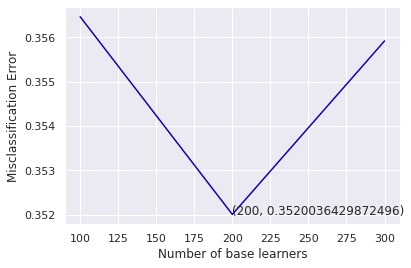

In [128]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [129]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
count_vectorizer_predicted = clf.predict(X_test)
print(classification_report(y_test ,count_vectorizer_predicted , target_names = ['0' , '1','2']))
print("Accuracy of the model is : ",accuracy_score(y_test,count_vectorizer_predicted))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      2627
           1       0.51      0.43      0.47       577
           2       0.69      0.64      0.66       456

    accuracy                           0.79      3660
   macro avg       0.68      0.65      0.67      3660
weighted avg       0.78      0.79      0.78      3660

Accuracy of the model is :  0.7885245901639344


Observation : 

The model accuracy is 0.78 which is higher than 0.75 as required in the problem statement, so this is good.

[[2349  196   82]
 [ 279  247   51]
 [ 128   38  290]]


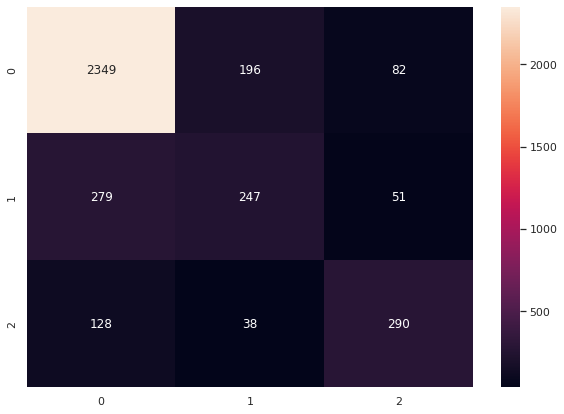

In [130]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, count_vectorizer_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['0', '1','2']],
                  columns = [i for i in ['0', '1','2']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

Observation:

Highest percentage of the text are rightly classified based on the confusion matrix 

thank,thanks,nt,usairways,hour,great,united,http,jetblue,flight,southwestair,delayed,awesome,love,bag,customer,cancelled,hold,virginamerica,get,delay,amazing,best,airline,time,please,plane,service,good,would,help,need,dm,one,worst,guy,never,know,still,got,
 
 


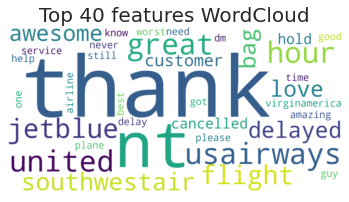

In [131]:
all_features = vectorizer.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','
    
print(top_features)  

print(" ") 
print(" ")   
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

# Solving the problem through TF-IDF 

In [132]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features=500)
data_features = tfidf_vect.fit_transform(data['text'])

data_features = data_features.toarray()

data_features.shape     #feature shape

(14640, 500)

In [133]:
#Defining X and y variable for modelling 
X = data_features

y = data.airline_sentiment

In [134]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [135]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(100,400,100).tolist()
base_ln

[100, 200, 300]

In [136]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

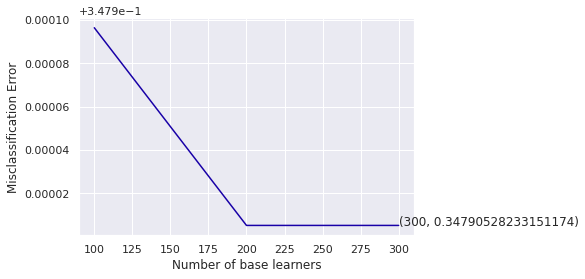

In [137]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [138]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
tf_idf_predicted = clf.predict(X_test)
print(classification_report(y_test , tf_idf_predicted , target_names = ['0' , '1', '2']))
print("Accuracy of the model is : ",accuracy_score(y_test,tf_idf_predicted))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2627
           1       0.55      0.21      0.31       577
           2       0.70      0.59      0.64       456

    accuracy                           0.78      3660
   macro avg       0.69      0.58      0.61      3660
weighted avg       0.76      0.78      0.75      3660

Accuracy of the model is :  0.7836065573770492


[[2477   82   68]
 [ 404  124   49]
 [ 171   18  267]]


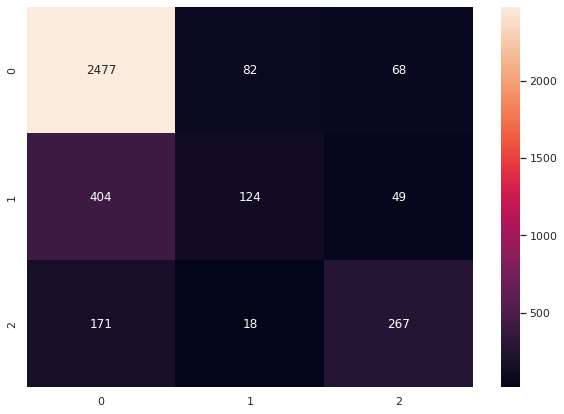

In [139]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, tf_idf_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['0', '1', '2']],
                  columns = [i for i in ['0', '1', '2']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

thanks, thank, jetblue, united, southwestair, http, usairways, flight, nt, great, hour, virginamerica, love, awesome, delayed, get, cancelled, bag, customer, amazing, dm, hold, please, best, airline, good, time, need, help, service, delay, would, tomorrow, plane, know, fly, got, like, flying, guy, 
 
 


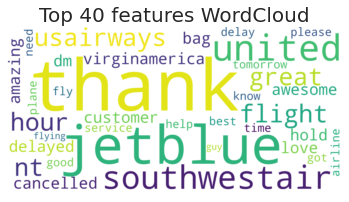

In [140]:
all_features = tfidf_vect.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=', '
    
print(top_features)  

print(" ") 
print(" ") 

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

In [141]:
#convert the test samples into a dataframe where the columns are
#the y_test(ground truth labels),tf-idf model predicted labels(tf_idf_predicted),Count Vectorizer model predicted labels(count_vectorizer_predicted)
df = pd.DataFrame(y_test.tolist(),columns =['y_test'])
df['count_vectorizer_predicted'] = count_vectorizer_predicted
df['tf_idf_predicted'] = tf_idf_predicted
df.head()

,y_test,count_vectorizer_predicted,tf_idf_predicted
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,2,0,0


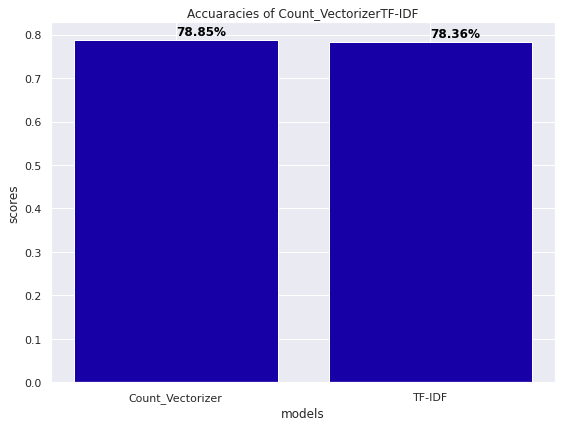

In [142]:
#create bar plot to compare the accuaracies of Count Vectorizer and TF-IDF
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
subjects = ['Count_Vectorizer', 'TF-IDF']

# calculation accuracies of Count Vectorizer and TF-IDF using accuracy_score metrics
scores = [accuracy_score(y_test,count_vectorizer_predicted),accuracy_score(y_test,tf_idf_predicted)]
ax.bar(subjects,scores)
ax.set_ylabel('scores',fontsize= 12)    # y axis label
ax.set_xlabel('models',fontsize= 12)    # x axis label
ax.set_title('Accuaracies of Count_Vectorizer'  'TF-IDF')  # tittle
for i, v in enumerate(scores):
    ax.text( i ,v+0.01, '{:.2f}%'.format(100*v), color='black', fontweight='bold')     
    plt.savefig('barplot_1.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

**Conclusion: **

1. The two vectorization gave almost the same result with Countvectorizer given the highest accuracy over Tf-IDF

2. Out of five predictions done only one instance was not predicted accurately and it was not predicted accurately by the two methods, which validate the accuracy score being 78% and almost equal 

3. The result of 40 top words from the two methods have a lot of similarity of words and this word can be used to understand better the view of the customers. 



